In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [4]:
test_data = pd.read_csv('DailyDelhiClimateTest.csv')
train_data = pd.read_csv('DailyDelhiClimateTrain.csv')

In [5]:

# Explore the structure of the datasets
print("Test Dataset Info:")
print(test_data.info())
print("\nFirst 5 rows of Test Dataset:")
print(test_data.head())

print("\nTrain Dataset Info:")
print(train_data.info())
print("\nFirst 5 rows of Train Dataset:")
print(train_data.head())



Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB
None

First 5 rows of Test Dataset:
         date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5

In [6]:
# Check for missing values
print("\nMissing values in Test Dataset:")
print(test_data.isnull().sum())

print("\nMissing values in Train Dataset:")
print(train_data.isnull().sum())



Missing values in Test Dataset:
date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

Missing values in Train Dataset:
date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


In [7]:

# Describe the key statistics of the datasets
print("\nKey Statistics for Test Dataset:")
print(test_data.describe())

print("\nKey Statistics for Train Dataset:")
print(train_data.describe())


Key Statistics for Test Dataset:
         meantemp    humidity  wind_speed  meanpressure
count  114.000000  114.000000  114.000000    114.000000
mean    21.713079   56.258362    8.143924   1004.035090
std      6.360072   19.068083    3.588049     89.474692
min     11.000000   17.750000    1.387500     59.000000
25%     16.437198   39.625000    5.563542   1007.437500
50%     19.875000   57.750000    8.069444   1012.739316
75%     27.705357   71.902778   10.068750   1016.739583
max     34.500000   95.833333   19.314286   1022.809524

Key Statistics for Train Dataset:
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.30

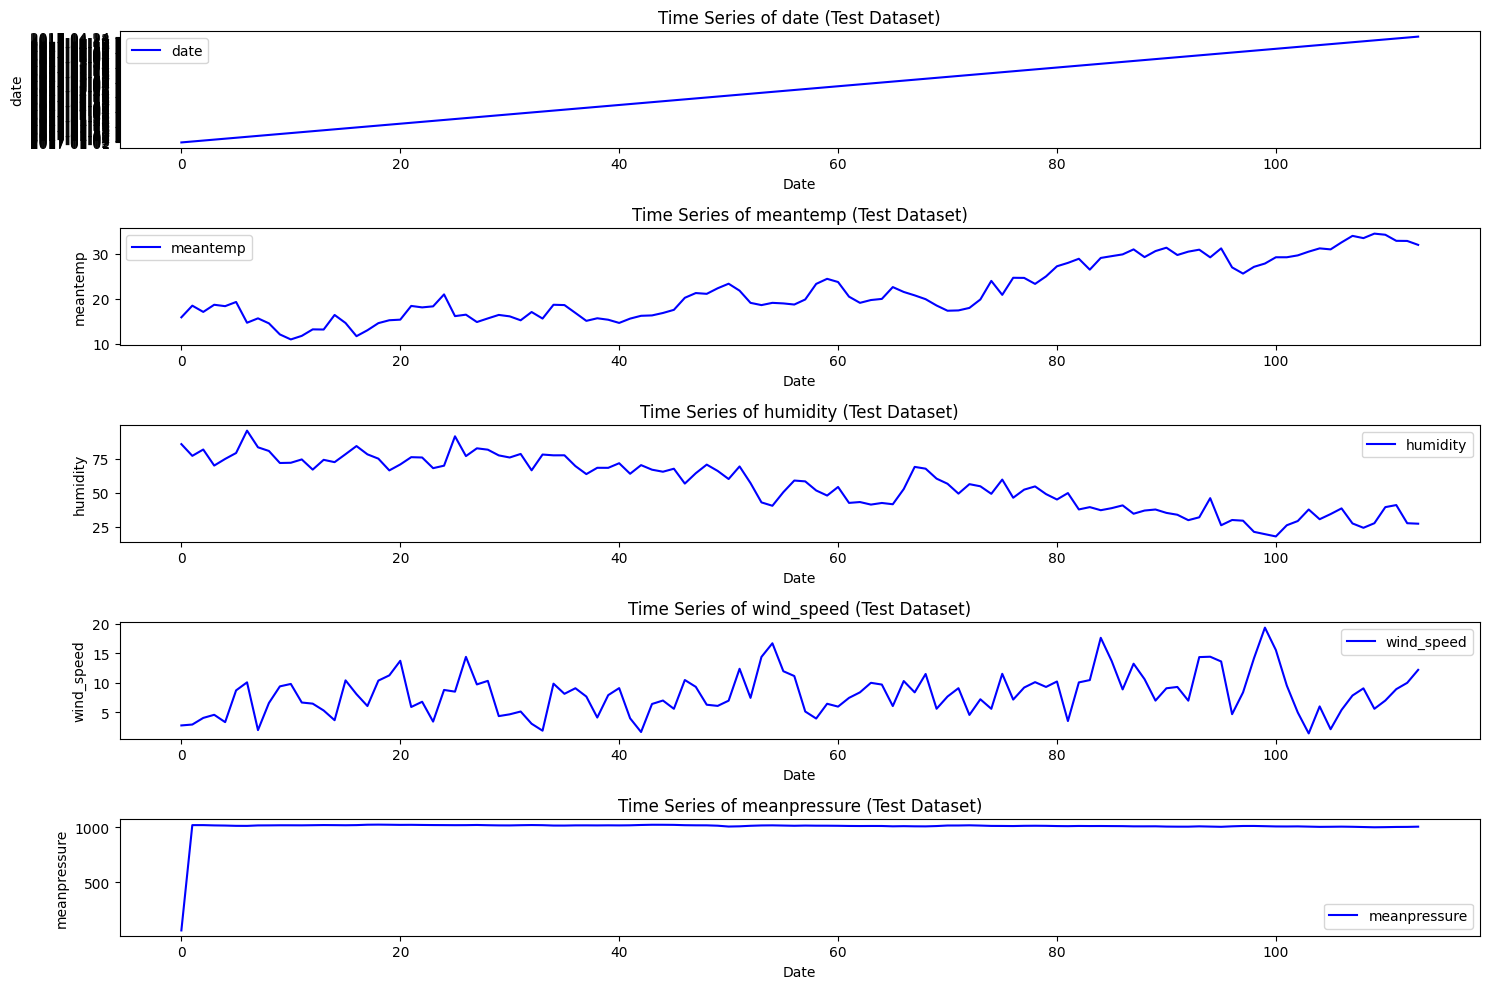

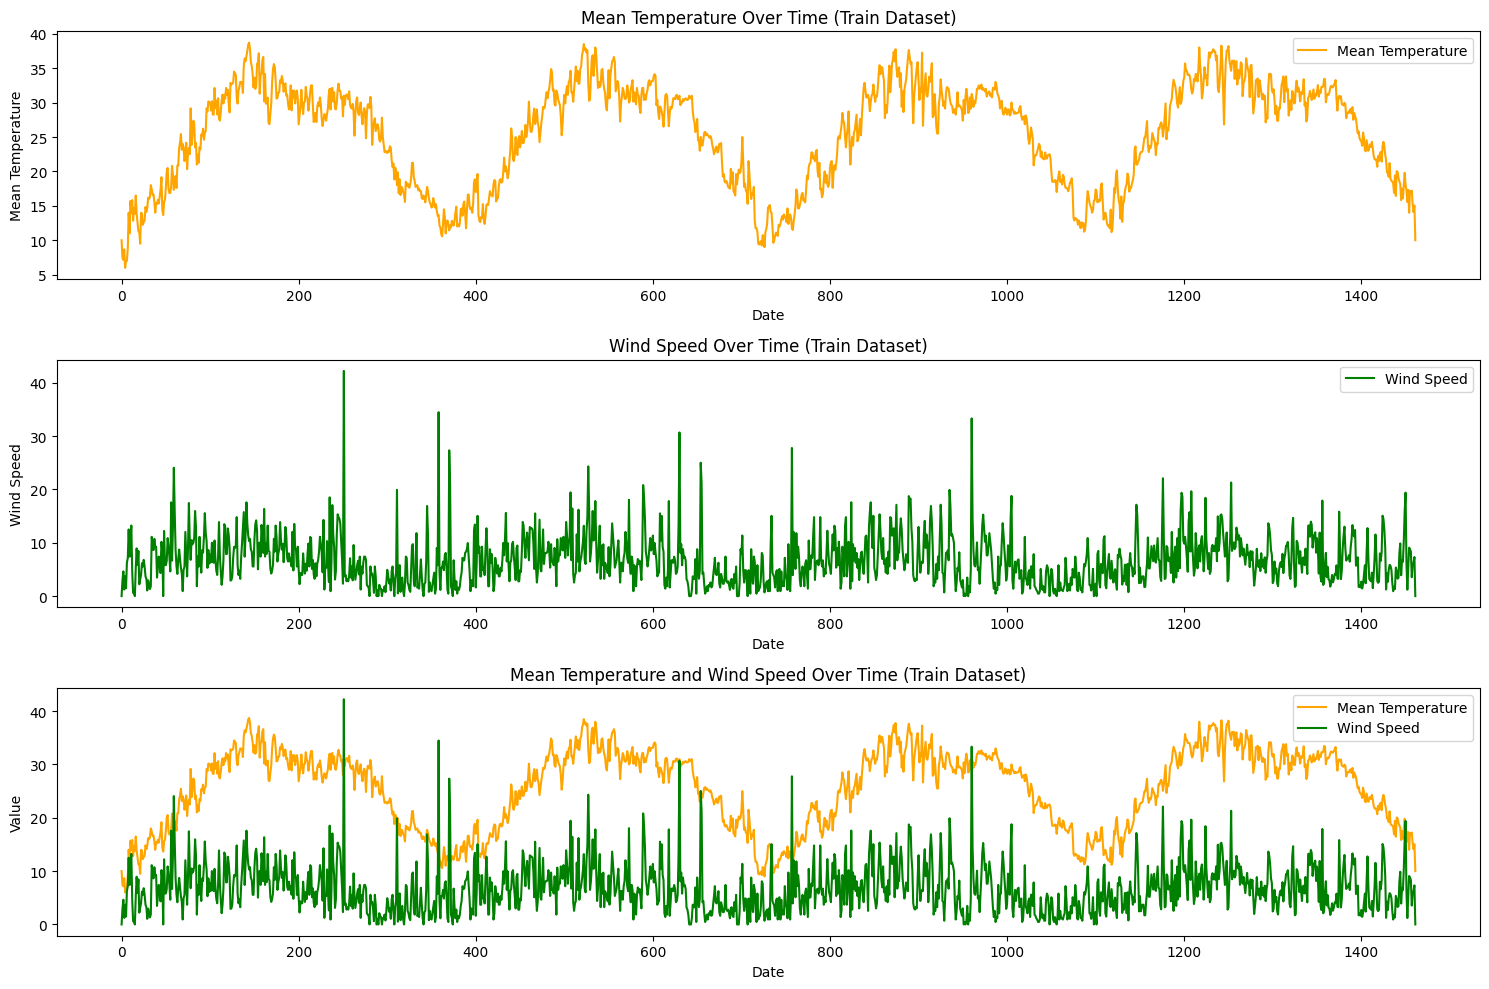

In [8]:
# Time Series Visualization for All Variables (Test Dataset)
plt.figure(figsize=(15, 10))
for i, column in enumerate(test_data.columns, 1):
    plt.subplot(len(test_data.columns), 1, i)
    plt.plot(test_data.index, test_data[column], label=column, color='blue')
    plt.title(f"Time Series of {column} (Test Dataset)")
    plt.xlabel("Date")
    plt.ylabel(column)
    plt.legend()

plt.tight_layout()
plt.show()

# Subplots: Relationship Between Temperature and Wind Speed (Train Dataset)
plt.figure(figsize=(15, 10))

# Plot Mean Temperature Over Time
plt.subplot(3, 1, 1)
plt.plot(train_data.index, train_data['meantemp'], label='Mean Temperature', color='orange')
plt.title("Mean Temperature Over Time (Train Dataset)")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()

# Plot Wind Speed Over Time
plt.subplot(3, 1, 2)
plt.plot(train_data.index, train_data['wind_speed'], label='Wind Speed', color='green')
plt.title("Wind Speed Over Time (Train Dataset)")
plt.xlabel("Date")
plt.ylabel("Wind Speed")
plt.legend()

# Combined Plot: Mean Temperature and Wind Speed
plt.subplot(3, 1, 3)
plt.plot(train_data.index, train_data['meantemp'], label='Mean Temperature', color='orange')
plt.plot(train_data.index, train_data['wind_speed'], label='Wind Speed', color='green')
plt.title("Mean Temperature and Wind Speed Over Time (Train Dataset)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()

plt.tight_layout()
plt.show()


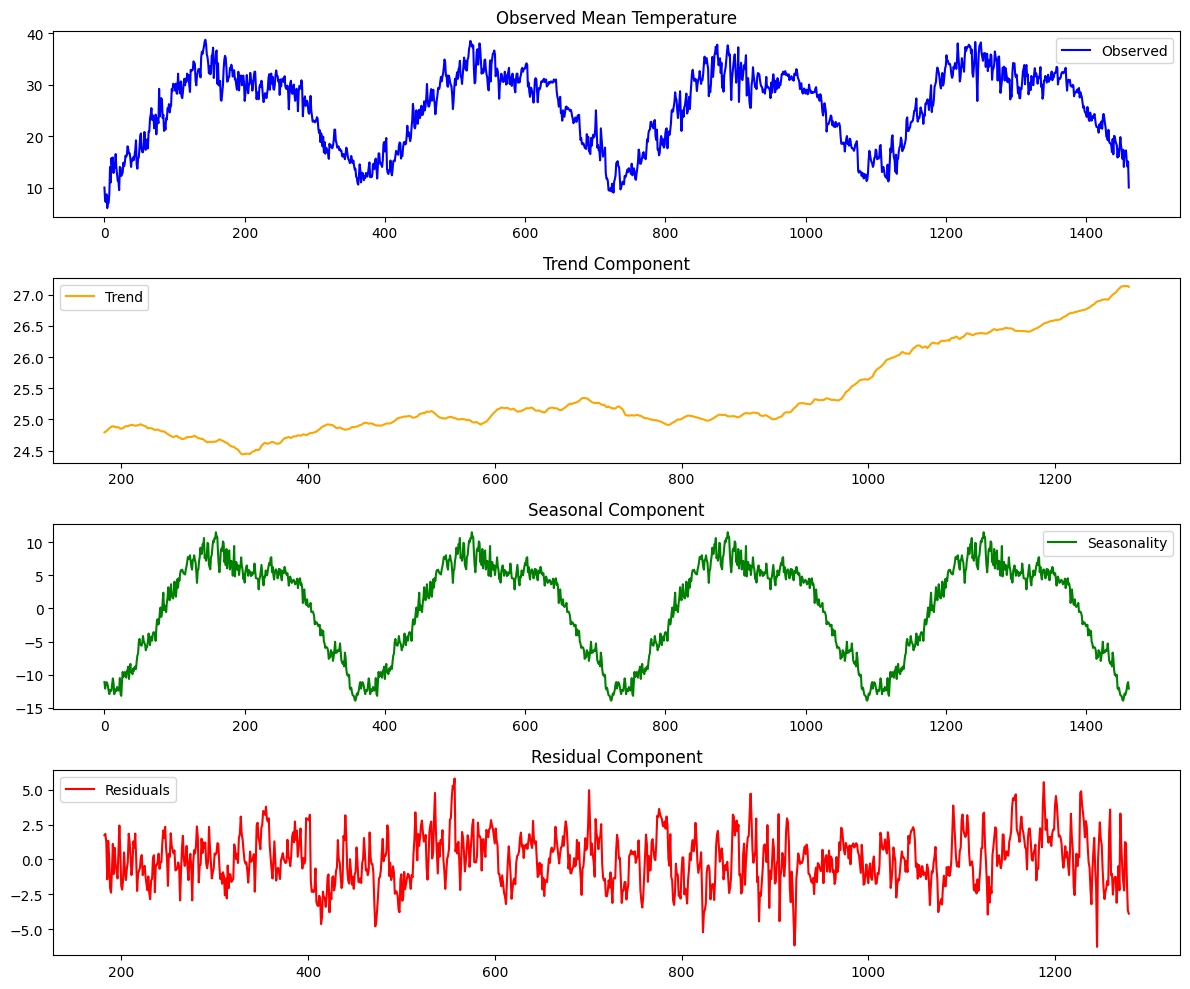

Seasonal Component Summary:
count    1462.000000
mean       -0.015875
std         7.116575
min       -13.909063
25%        -6.300945
50%         2.862091
75%         5.776824
max        11.478642
Name: seasonal, dtype: float64


In [9]:
# Import necessary library for decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

result = seasonal_decompose(train_data['meantemp'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 10))

# Observed Component
plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observed', color='blue')
plt.title('Observed Mean Temperature')
plt.legend()

# Trend Component
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend()

# Seasonal Component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonality', color='green')
plt.title('Seasonal Component')
plt.legend()

# Residual Component
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals', color='red')
plt.title('Residual Component')
plt.legend()

plt.tight_layout()
plt.show()

# Summary statistics of the seasonal component
seasonality_summary = result.seasonal.describe()
print("Seasonal Component Summary:")
print(seasonality_summary)


Mean Absolute Error (MAE): 10.605959965314925
Root Mean Squared Error (RMSE): 12.051593799168218


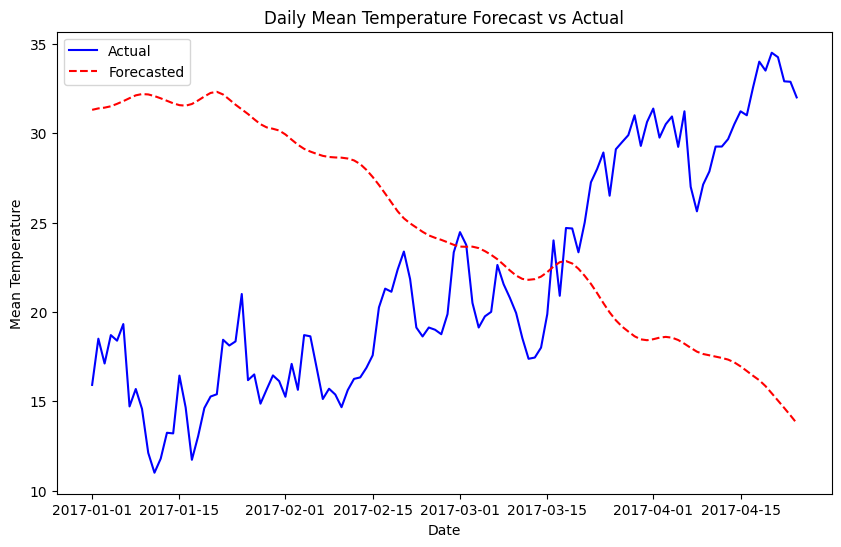

In [10]:
# Step 1: Import necessary libraries


# Step 2: Load the datasets
train_data = pd.read_csv('DailyDelhiClimateTrain.csv', parse_dates=['date'], index_col='date')
test_data = pd.read_csv('DailyDelhiClimateTest.csv', parse_dates=['date'], index_col='date')

# Step 3: Select the variable (e.g., 'meantemp' for daily mean temperature)
train = train_data['meantemp']
test = test_data['meantemp']

# Step 4: Split the dataset into training and testing sets

# Step 5: Fit STL model to the training data

stl = STL(train, seasonal=13)
result = stl.fit()

# Extract the trend component and forecast using it
trend_forecast = result.trend[-len(test):]
# Step 6: Evaluate the forecasting performance

# Calculate MAE and RMSE
mae = mean_absolute_error(test, trend_forecast)
rmse = sqrt(mean_squared_error(test, trend_forecast))

# Print the results
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Optional: Visualize the forecast vs actual
plt.figure(figsize=(10,6))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, trend_forecast, label='Forecasted', color='red', linestyle='--')
plt.legend()
plt.title('Daily Mean Temperature Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.show()
